### Simple Classifiers 

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
# df_filmweb, df_imdb = pd.read_csv("datasets/ready_data_filmweb_200_eq.csv"), pd.read_csv("datasets/ready_data_imdb_200_eq.csv")

In [4]:
# X_filmweb, X_imdb = df_filmweb.description.values, df_imdb.description.values
# y_filmweb, y_imdb = df_filmweb.genre.values, df_imdb.genre.values

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrixs(y_preds, y_true, labels, model_names):
    
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(40, 50))
    for i, y_pred in enumerate(y_preds):
        cm = confusion_matrix(y_true, y_pred, normalize="true")
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        disp.plot(cmap="Blues", values_format=".2f", ax=ax[i], colorbar=False)
        ax[i].set_title(model_names[i])
        plt.title(f"Normalized confusion matrix - {model_names[i]}")
        print(f"Accuracy for {model_names[i]}: {accuracy_score(y_true, y_pred)}")
    plt.show()
    

In [6]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
    # "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42)
}

In [7]:
def train_and_evaluate(path_filmweb, path_imdb):
    df_filmweb, df_imdb = pd.read_csv(path_filmweb), pd.read_csv(path_imdb)
    
    X_filmweb, X_imdb = df_filmweb.description.values, df_imdb.description.values
    y_filmweb, y_imdb = df_filmweb.genre.values, df_imdb.genre.values

    predictions_dict = {"Filmweb": {}, "Imdb": {}}

    le = LabelEncoder()
    le1 = LabelEncoder()
    y_filmweb_encoded, y_imdb_encoded = le.fit_transform(y_filmweb), le1.fit_transform(y_imdb)

    for model_name in models:
        print(model_name)
        pipeline = Pipeline([
            ("TfIdf", TfidfVectorizer()),
            (model_name, models[model_name])
        ])
        
        filmweb_pred = cross_val_predict(pipeline, X_filmweb, y_filmweb_encoded)
        imdb_pred = cross_val_predict(pipeline, X_imdb, y_imdb_encoded)
        
        predictions_dict["Filmweb"][model_name] = filmweb_pred
        predictions_dict["Imdb"][model_name] = imdb_pred
    ## TODO: Make it plot also for Imdb for comparison and maybe create a third matrix which will
    ## show the differences between both confusion matrices
    plot_confusion_matrixs(predictions_dict["Filmweb"].values(), y_filmweb_encoded, le.classes_, list(models.keys()))


## Different datasets sizes and balance

#### 50 up
At least 50 examples from each class and no upper limit

In [8]:
train_and_evaluate("datasets/ready_data_filmweb_50_up.csv", "datasets/ready_data_imdb_50_up.csv")

Logistic Regression
Decision Tree


In [ ]:
## Some conclusions

#### 200 eq
Exactly 200 samples from each class

Logistic Regression
Decision Tree
Random Forest
Accuracy for Logistic Regression: 0.3259090909090909
Accuracy for Decision Tree: 0.18
Accuracy for Random Forest: 0.2731818181818182


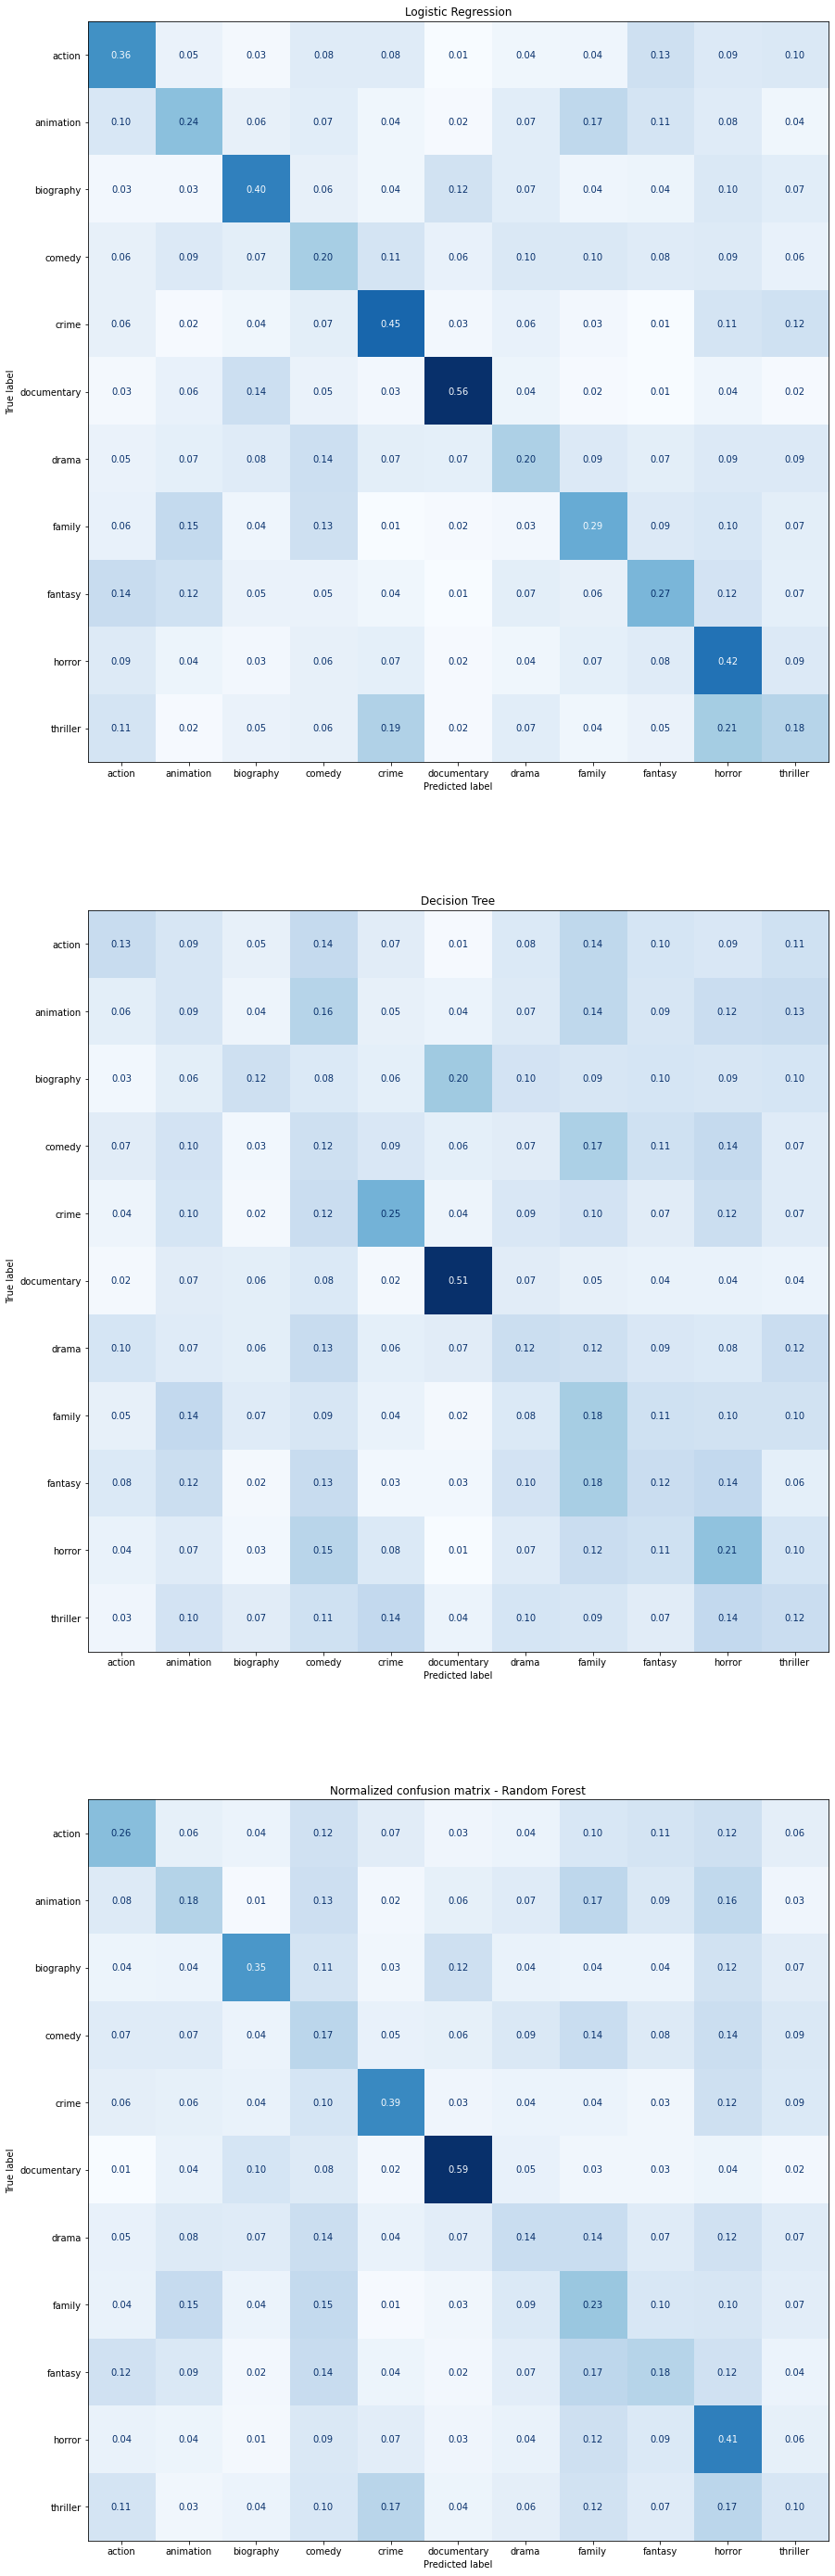

In [ ]:
train_and_evaluate("datasets/ready_data_filmweb_200_eq.csv", "datasets/ready_data_imdb_200_eq.csv")

In [ ]:
## Some conclusions